# IIASA NGFS Scenarios Tutorial

The IIASA Energy Program provides a set of scenarios targetting 1.5°C (SR15)
### https://pyam-iamc.readthedocs.io/en/stable/tutorials/iiasa_dbs.html

In [16]:
#Link to the installation of Pyam: https://pypi.org/project/pyam/
# It is very important to use this command in to install pyam: pip install pyam-iamc
import pandas as pd
import numpy as np
import yaml
import pyam

#connect to the IIASA API
conn = pyam.iiasa.Connection()
conn.valid_connections

pyam.iiasa - INFO: You are connected as an anonymous user


['cdlinks',
 'cmin',
 'deeds',
 'hotspots',
 'integration-test',
 'nexus-basins',
 'ngfs',
 'paris_lttg',
 'ripples',
 'senses',
 'setnav',
 'iamc15',
 'iamc15-qa',
 'sandbox']

In [14]:
# the quantiative scenario ensemble underpinning the IPCC Special Report on Global Warming of 1.5C (SR15)

In [18]:
#The idea here is to download a specific instance
#This is the data from MESSAGEix that are in World region with CO2 variables and Primary energy for Coal
df = pyam.read_iiasa(
    'iamc15',
    model='MESSAGEix*',
    variable=['Emissions|CO2', 'Primary Energy|Coal'],
    region='World',
    meta=['category']
)

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


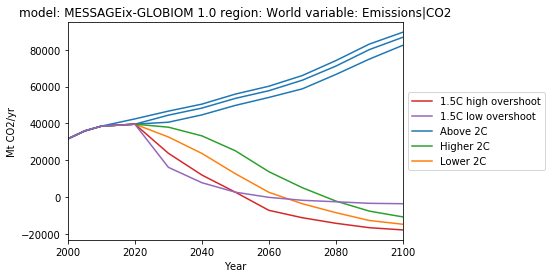

In [20]:
#Here we can plot the various results for CO2 emissions
ax = df.filter(variable='Emissions|CO2').line_plot(
    color='category',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

In [21]:
#It could also be interesting to plot a scatter plot for the scenarios

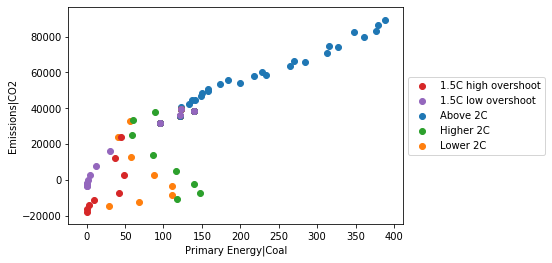

In [22]:
ax = df.scatter(
    x='Primary Energy|Coal',
    y='Emissions|CO2',
    color='category',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

# The code below allows to explore the data available

In [24]:
#connection
conn = pyam.iiasa.Connection('iamc15')

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [25]:
conn.models().head()

0        AIM/CGE 2.0
1        AIM/CGE 2.1
2      C-ROADS-5.005
3           GCAM 4.2
4    GENeSYS-MOD 1.0
Name: model, dtype: object

In [26]:
conn.scenarios().head()

0    ADVANCE_2020_1.5C-2100
1        ADVANCE_2020_Med2C
2         ADVANCE_2020_WB2C
3        ADVANCE_2030_Med2C
4    ADVANCE_2030_Price1.5C
Name: scenario, dtype: object

In [27]:
conn.variables().head()

0    AR5 climate diagnostics|Concentration|CO2|FAIR...
1    AR5 climate diagnostics|Concentration|CO2|MAGI...
2    AR5 climate diagnostics|Forcing|Aerosol|Direct...
3    AR5 climate diagnostics|Forcing|Aerosol|MAGICC...
4    AR5 climate diagnostics|Forcing|Aerosol|Total|...
Name: variable, dtype: object

In [28]:
conn.regions().head()

0     World
1    R5ROWO
2    R5ASIA
3     R5LAM
4     R5MAF
Name: region, dtype: object

In [29]:
conn.meta_columns.head()

0       Kyoto-GHG|2010 (SAR)
1                   baseline
2          carbon price|2030
3    carbon price|2030 (NPV)
4          carbon price|2050
Name: name, dtype: object

In [30]:
#It is possible to put a query on the connection directly and get the results in a dataframe

In [31]:
df = conn.query(
    model='MESSAGEix*',
    variable=['Emissions|CO2', 'Primary Energy|Coal'],
    region='World'
)

In [32]:
#We can then plot again the data

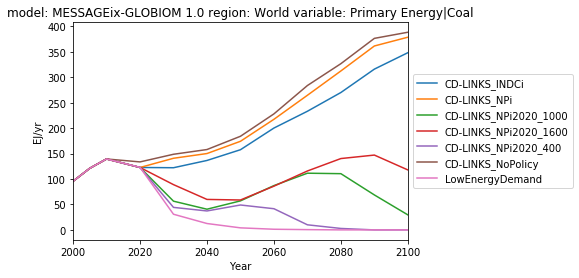

In [33]:
ax = df.filter(variable='Primary Energy|Coal').line_plot(
    color='scenario',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)